<a href="https://colab.research.google.com/github/DevarshDamoDaran/my-repository/blob/master/WQITimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Develop LSTM Models For Univariate Time Series Forecasting

In [ ]:

# univariate lstm example
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving output.csv to output.csv
User uploaded file "output.csv" with length 1953 bytes


In [ ]:
df = pd.read_csv("output.csv", encoding= 'unicode_escape')
df = df.iloc[0:1900, :]
df.shape
df

,ï»¿,STATIONCODE,LOCATION,STATE,RIVER,DO,pH,COND,BOD,NI,FC,TC,YEAR,WQI
0,0,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,9.800000,8.500000,2574.000000,1.700,2.20,17.0,170.000000,2019.0,65.400487
1,1,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,9.746154,8.215385,949.923077,0.425,0.67,53.6,314.363636,2018.0,49.748354
2,2,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,10.100000,8.000000,366.000000,0.200,0.20,2.0,20.000000,2017.0,40.930300
3,3,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,10.100000,8.000000,499.000000,0.100,1.00,53.6,314.363636,2016.0,41.366946
4,4,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,10.000000,8.200000,601.000000,0.200,0.10,53.6,314.363636,2015.0,46.129273
5,5,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,9.900000,8.300000,983.000000,0.200,0.50,30.0,144.000000,2014.0,47.915094
6,6,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,9.700000,8.100000,426.000000,0.100,1.03,21.0,75.000000,2013.0,44.241394
7,7,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,9.300000,8.300000,395.000000,0.100,0.73,17.0,61.000000,2012.0,49.506642
8,8,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,9.700000,8.200000,424.000000,0.200,0.50,3.0,12.000000,2010.0,46.392548
9,9,1867,"SATLUJ B/C WITH RIVER SPITI AT KHAB, DISTT.KIN...",HIMACHAL PRADESH,SATLEJ,8.500000,8.100000,425.000000,0.100,0.11,0.0,5.000000,2009.0,49.434131


<AxesSubplot:>

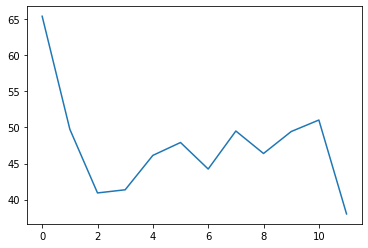

In [ ]:
timeseries_data = df['WQI']
timeseries_data.plot()

In [ ]:
# define input sequence
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[65.40048725 49.74835407 40.93029971]
 [49.74835407 40.93029971 41.36694638]
 [40.93029971 41.36694638 46.12927333]
 [41.36694638 46.12927333 47.91509362]
 [46.12927333 47.91509362 44.2413942 ]
 [47.91509362 44.2413942  49.50664203]
 [44.2413942  49.50664203 46.39254754]
 [49.50664203 46.39254754 49.43413101]
 [46.39254754 49.43413101 51.02788203]]
[41.36694638 46.12927333 47.91509362 44.2413942  49.50664203 46.39254754
 49.43413101 51.02788203 38.02473565]


(None, None)

In [ ]:
X.shape

(9, 3, 1)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building Machine Learning Model

In [ ]:
# CNN-BiLSTM model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, activation='relu', input_shape=(n_steps, n_features))))
model.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam

# fit model
model.fit(X, y, epochs=600, verbose=1)

In [ ]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=600, verbose=1)


### Predicting For the next 10 data

In [ ]:
# demonstrate prediction for next 10 years
x_input = np.array([49.43413101, 51.02788203, 38.02473565])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} year input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} year output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[46.346756]
1 year input [51.02788203 38.02473565 46.34675598]
1 year output [[41.432457]]
2 year input [38.02473565 46.34675598 41.43245697]
2 year output [[46.118233]]
3 year input [46.346756 41.432457 46.118233]
3 year output [[48.228817]]
4 year input [41.432457 46.118233 48.228817]
4 year output [[43.630608]]
5 year input [46.118233 48.228817 43.630608]
5 year output [[49.161755]]
6 year input [48.228817 43.630608 49.161755]
6 year output [[47.55567]]
7 year input [43.630608 49.161755 47.55567 ]
7 year output [[46.806484]]
8 year input [49.161755 47.55567  46.806484]
8 year output [[52.40012]]
9 year input [47.55567  46.806484 52.40012 ]
9 year output [[33.71522]]
[46.346756, 41.432457, 46.118233, 48.228817, 43.630608, 49.161755, 47.55567, 46.806484, 52.40012, 33.71522]


In [ ]:

d= timeseries_data[(len(timeseries_data)-n_steps):]
dx = np.array(d)
temp_input=list(dx)
dx = dx.reshape((1, n_steps, n_features))
yhat = model.predict(dx, verbose=0)
print("Predicted WQI value = {}".format(yhat))


Predicted WQI value = [[46.346756]]


In [ ]:
timeseries_data

In [ ]:
len(timeseries_data)

In [ ]:
lst_output

### Visualizaing The Output

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
year_new=np.arange(1,13)
year_pred=np.arange(13,23)

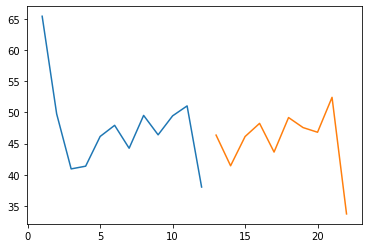

In [ ]:
plt.plot(year_new,timeseries_data)
plt.plot(year_pred,lst_output)
